# Training a Sequence Classifier

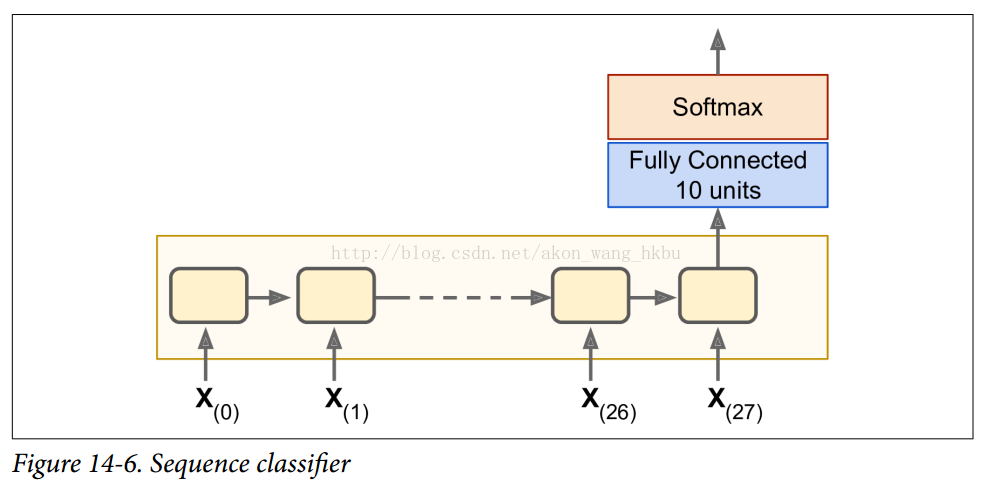

In [1]:
from IPython.display import Image
Image(filename = "img/Sequence_classifier.png", width = 600, height = 300)


In [1]:
import tensorflow as tf
import numpy as np

n_steps = 28
n_inputs = 28
n_neurons = 150
n_outputs = 10

# learning rate
lr = 0.001

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.int32, [None])

basic_cell = tf.contrib.rnn.BasicRNNCell(num_units=n_neurons)
outputs, states = tf.nn.dynamic_rnn(basic_cell, X, dtype = tf.float32)

logits = tf.layers.dense(states, n_outputs) # use tf.layers_dense instead of tf.layers_fully_connected
xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels = y, logits = logits)

loss = tf.reduce_mean(xentropy)
optimizer = tf.train.AdamOptimizer(learning_rate = lr)
training_op = optimizer.minimize(loss)
correct = tf.nn.in_top_k(logits, y, 1)
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()


In [2]:
# Get the mini dataset Mnist for training and testing
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('data')
X_test = mnist.test.images.reshape(-1, n_steps, n_inputs)
y_test = mnist.test.labels

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
n_epoches = 30
batch_size = 100

# Execute the initialized variables and print the output.
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epoches):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            X_batch = X_batch.reshape((-1, n_steps, n_inputs))
            sess.run(training_op, feed_dict = {X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict = {X: X_batch, y:y_batch})
        acc_test = accuracy.eval(feed_dict = {X: X_test, y: y_test})
            
        print(epoch, "Train accuracy: ", acc_train, "Test accuracy: ", acc_test)
            

0 Train accuracy:  0.97 Test accuracy:  0.9127
1 Train accuracy:  0.97 Test accuracy:  0.9541
2 Train accuracy:  0.99 Test accuracy:  0.954
3 Train accuracy:  0.99 Test accuracy:  0.9638
4 Train accuracy:  0.96 Test accuracy:  0.9557
5 Train accuracy:  0.96 Test accuracy:  0.9659
6 Train accuracy:  0.99 Test accuracy:  0.9712
7 Train accuracy:  0.97 Test accuracy:  0.9672
8 Train accuracy:  0.98 Test accuracy:  0.9693
9 Train accuracy:  1.0 Test accuracy:  0.9716
10 Train accuracy:  0.97 Test accuracy:  0.9723
11 Train accuracy:  0.98 Test accuracy:  0.9723
12 Train accuracy:  0.98 Test accuracy:  0.9715
13 Train accuracy:  1.0 Test accuracy:  0.9727
14 Train accuracy:  0.99 Test accuracy:  0.9699
15 Train accuracy:  1.0 Test accuracy:  0.9737
16 Train accuracy:  0.96 Test accuracy:  0.968
17 Train accuracy:  0.99 Test accuracy:  0.9766
18 Train accuracy:  0.98 Test accuracy:  0.9738
19 Train accuracy:  0.99 Test accuracy:  0.9746
20 Train accuracy:  1.0 Test accuracy:  0.9711
21 Train

In [1]:
from IPython.display import Image
Image(filename = "img/3LayersRNN.png", width=300, height=200)



You can refer to this picture which specifically describles the model built through codes (up) or
You can refer to the second picture which illustrates a more general idea of how a 3-layers-DRNN model is constructed (below).

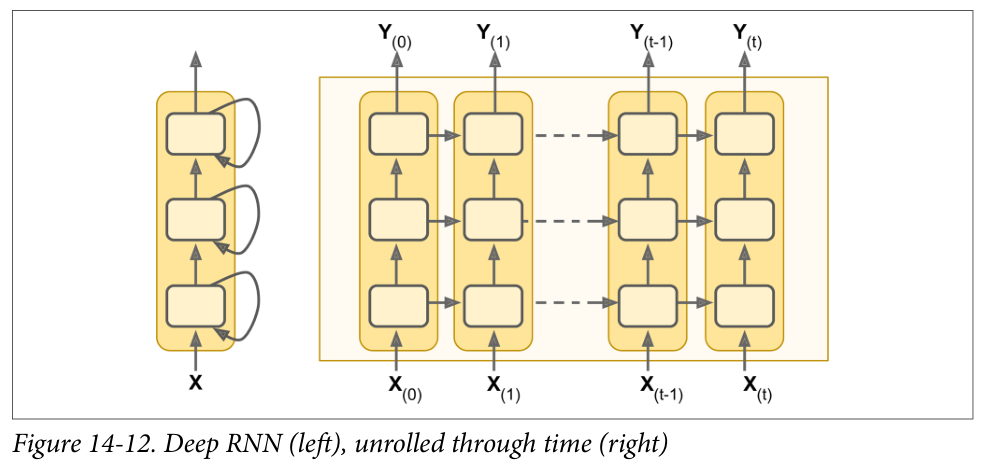

In [2]:
from IPython.display import Image
Image(filename = "img/DRNN multi-layers.png", width = 800, height = 400)

# MultiLayer RNN （Deep RNN）

In [1]:
import tensorflow as tf
from tensorflow.contrib.layers import fully_connected # 求解释，为什么RNN要用到全连接层
n_steps = 28
n_inputs = 28
n_neurons1 = 150
n_neurons2 = 100
n_outputs = 10

lr = 0.001

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.int32, [None])

hidden1 = tf.contrib.rnn.BasicRNNCell(num_units=n_neurons1, activation=tf.nn.relu)
hidden2 = tf.contrib.rnn.BasicRNNCell(num_units=n_neurons2, activation=tf.nn.relu)
multi_layer_cell = tf.contrib.rnn.MultiRNNCell([hidden1, hidden2])
outputs, states_tuple = tf.nn.dynamic_rnn(multi_layer_cell, X, dtype = tf.float32)
states = tf.concat(axis = 1, values=states_tuple)
logits = fully_connected(states, n_outputs, activation_fn=None)
xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)

loss = tf.reduce_mean(xentropy)
optimizer = tf.train.AdamOptimizer(learning_rate=lr)
training_op = optimizer.minimize(loss)
correct = tf.nn.in_top_k(logits, y, 1)
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()


In [2]:
n_epoches = 30
batch_size = 150

# Get the mini dataset Mnist for training and testing
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('data')
X_test = mnist.test.images.reshape(-1, n_steps, n_inputs)
y_test = mnist.test.labels

# Execute the initialized variables and print the output.
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epoches):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            X_batch = X_batch.reshape(-1, n_steps, n_inputs)
            sess.run(training_op, feed_dict = {X:X_batch, y:y_batch})
        acc_train = accuracy.eval(feed_dict = {X:X_batch, y:y_batch})
        acc_test = accuracy.eval(feed_dict = {X:X_test, y: y_test})
        
        print(epoch, "Train accuracy: ", acc_train, "Test accuracy: ", acc_test)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
0 Train accuracy:  0.9533333 Test accuracy:  0.929
1 Train accuracy:  0.9533333 Test accuracy:  0.9512
2 Train accuracy:  0.97333336 Test accuracy:  0.9588
3 Train accuracy:  0.94666666 Test accuracy:  0.9645
4 Train accuracy:  0.96 Test accuracy:  0.9691
5 Train accuracy:  1.0 Test accuracy:  0.9746
6 Train accuracy:  0.99333334 Test accuracy:  0.9724
7 Train accuracy:  0.98 Test ac

# Coming soon...
>> Deep RNN in Time Series (multiple layer);  
>> Apply drop_out layers;  
>> multi-layer LSTM in Deep RNN;  



# LSTM Multi-layers

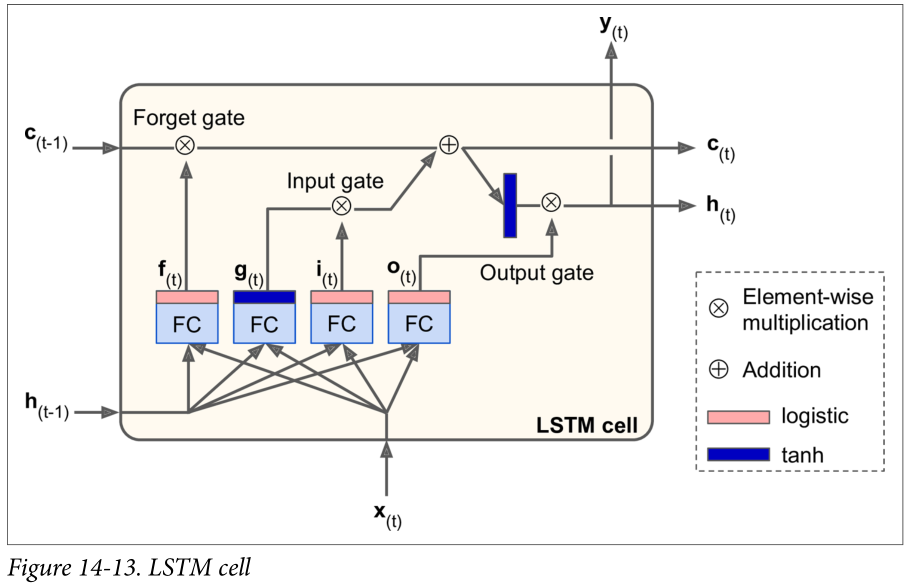

In [1]:
from IPython.display import Image
Image(filename = "img/LSTM.png", width = 800, height = 400)

In [1]:
import tensorflow as tf
from tensorflow.contrib.layers import fully_connected

n_steps = 28
n_inputs = 28
n_neurons = 150
n_outputs = 10
n_layers = 3

lr = 0.001

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.int32, [None])

lstm_cell = tf.contrib.rnn.BasicLSTMCell(num_units=n_neurons)
lstm_cells = [tf.contrib.rnn.BasicLSTMCell(num_units=n_neurons)
              for layer in range(n_layers)]

multi_cell = tf.contrib.rnn.MultiRNNCell(lstm_cells)
outputs, states = tf.nn.dynamic_rnn(multi_cell, X, dtype=tf.float32)
top_layer_h_state = states[-1][1]
logits = fully_connected(top_layer_h_state, n_outputs, activation_fn=None, scope='softmax')
xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
loss = tf.reduce_mean(xentropy, name = 'loss')
optimizer = tf.train.AdamOptimizer(learning_rate = lr)
training_op = optimizer.minimize(loss)
correct = tf.nn.in_top_k(logits, y, 1)
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()

print(outputs.shape)




(?, 28, 150)


In [2]:
states

(LSTMStateTuple(c=<tf.Tensor 'rnn/while/Exit_3:0' shape=(?, 150) dtype=float32>, h=<tf.Tensor 'rnn/while/Exit_4:0' shape=(?, 150) dtype=float32>),
 LSTMStateTuple(c=<tf.Tensor 'rnn/while/Exit_5:0' shape=(?, 150) dtype=float32>, h=<tf.Tensor 'rnn/while/Exit_6:0' shape=(?, 150) dtype=float32>),
 LSTMStateTuple(c=<tf.Tensor 'rnn/while/Exit_7:0' shape=(?, 150) dtype=float32>, h=<tf.Tensor 'rnn/while/Exit_8:0' shape=(?, 150) dtype=float32>))

In [3]:
states[-1]

LSTMStateTuple(c=<tf.Tensor 'rnn/while/Exit_7:0' shape=(?, 150) dtype=float32>, h=<tf.Tensor 'rnn/while/Exit_8:0' shape=(?, 150) dtype=float32>)

In [4]:
top_layer_h_state

<tf.Tensor 'rnn/while/Exit_8:0' shape=(?, 150) dtype=float32>

In [5]:
# Get the mini dataset Mnist for training and testing
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('data')
X_test = mnist.test.images.reshape(-1, n_steps, n_inputs)
y_test = mnist.test.labels

n_epoches = 10
batch_size = 150
data_quantity = mnist.train.num_examples

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epoches):
        for iteration in range(data_quantity // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            X_batch = X_batch.reshape(batch_size, n_steps, n_inputs)
            sess.run(training_op, feed_dict = {X:X_batch, y:y_batch})
        acc_train = accuracy.eval(feed_dict = {X:X_batch, y:y_batch})
        acc_test = accuracy.eval(feed_dict = {X:X_test, y:y_test})
        print("epoch", epoch, "Train Accuracy: ", acc_train, "Test accuracy = ", acc_test)
    

Extracting data/train-images-idx3-ubyte.gz
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz
epoch 0 Train Accuracy:  0.96666664 Test accuracy =  0.9539
epoch 1 Train Accuracy:  0.9533333 Test accuracy =  0.971
epoch 2 Train Accuracy:  0.98 Test accuracy =  0.9723
epoch 3 Train Accuracy:  0.98 Test accuracy =  0.9595
epoch 4 Train Accuracy:  1.0 Test accuracy =  0.9819
epoch 5 Train Accuracy:  1.0 Test accuracy =  0.9804
epoch 6 Train Accuracy:  1.0 Test accuracy =  0.9845
epoch 7 Train Accuracy:  0.98 Test accuracy =  0.9823
epoch 8 Train Accuracy:  1.0 Test accuracy =  0.9874
epoch 9 Train Accuracy:  1.0 Test accuracy =  0.9865


In [1]:
from IPython.display import clear_output, Image, display, HTML

def strip_consts(graph_def, max_const_size=32):
    """Strip large constant values from graph_def."""
    strip_def = tf.GraphDef()
    for n0 in graph_def.node:
        n = strip_def.node.add() 
        n.MergeFrom(n0)
        if n.op == 'Const':
            tensor = n.attr['value'].tensor
            size = len(tensor.tensor_content)
            if size > max_const_size:
                tensor.tensor_content = "<stripped %d bytes>"%size
    return strip_def

def show_graph(graph_def, max_const_size=32):
    """Visualize TensorFlow graph."""
    if hasattr(graph_def, 'as_graph_def'):
        graph_def = graph_def.as_graph_def()
    strip_def = strip_consts(graph_def, max_const_size=max_const_size)
    code = """
        <script>
          function load() {{
            document.getElementById("{id}").pbtxt = {data};
          }}
        </script>
        <link rel="import" href="https://tensorboard.appspot.com/tf-graph-basic.build.html" onload=load()>
        <div style="height:600px">
          <tf-graph-basic id="{id}"></tf-graph-basic>
        </div>
    """.format(data=repr(str(strip_def)), id='graph'+str(np.random.rand()))

    iframe = """
        <iframe seamless style="width:1200px;height:620px;border:0" srcdoc="{}"></iframe>
    """.format(code.replace('"', '&quot;'))
    display(HTML(iframe))

In [2]:
import numpy as np
show_graph(tf.get_default_graph())

NameError: name 'tf' is not defined